In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
sw = stopwords.words('english')
import matplotlib.pyplot as plt
import seaborn as sns


Using TensorFlow backend.


## Reading the dataset

In [2]:
data = pd.read_csv('train.csv')
data1 = pd.read_csv('test.csv')

In [3]:
# Data Information

data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
user_name             15927 non-null object
country               20661 non-null object
review_title          20665 non-null object
review_description    20665 non-null object
designation    

In [4]:
#Calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
data.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [5]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


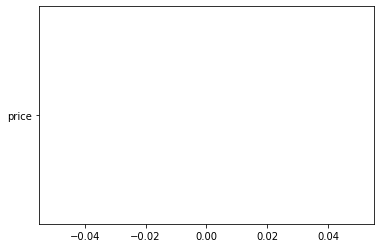

In [18]:
plt.plot('price')
plt.show()

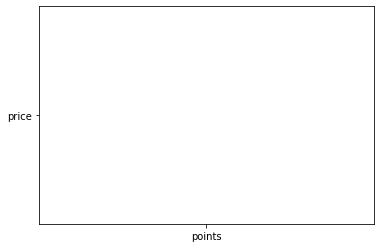

In [21]:
plt.bar('points','price')
plt.show()

# Feature Extraction

Imputation

In [22]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing valu rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

Numerical imputation

In [23]:
#function is used to remove missing values .
data.dropna(axis=0)


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
10,@vboone,US,Cuvaison 2014 Estate Grown Sauvignon Blanc (Ca...,With an alluring bouquet of fresh-cut jasmine ...,Estate Grown,90,18.0,California,Carneros,Napa-Sonoma,Cuvaison,Sauvignon Blanc
34,@paulgwine,US,Durant 2013 Raven Chardonnay (Dundee Hills),"Peach pit, apple and pear fruit flavors combin...",Raven,92,25.0,Oregon,Dundee Hills,Willamette Valley,Durant,Chardonnay
...,...,...,...,...,...,...,...,...,...,...,...,...
82630,@vboone,US,Yorkville Cellars 2010 Randle Hill Vineyard Sa...,"A glass of pretty aromatics, grapefruit and or...",Randle Hill Vineyard,88,18.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Sauvignon Blanc
82632,@vboone,US,un4seen 2009 Red blend Red (California),"Dark like a cave in color, this big red blend ...",Red blend,85,10.0,California,California,California Other,un4seen,Red Blend
82639,@paulgwine,US,Archery Summit 2012 Red Hills Estate Pinot Noi...,"Showing a light whiff of funk, this seems a bi...",Red Hills Estate,92,85.0,Oregon,Dundee Hills,Willamette Valley,Archery Summit,Pinot Noir
82641,@gordone_cellars,US,The Withers Winery 2013 Mr. Burgess Red (El Do...,"Imposing, concentrated and tannic, this Syrah-...",Mr. Burgess,92,36.0,California,El Dorado,Sierra Foothills,The Withers Winery,Rhône-style Red Blend


In [24]:
#Max fill function for categorical columns
data['price'].fillna(data['price'].value_counts()
.idxmax(), inplace=True)

In [25]:
encoded_columns = pd.get_dummies(data['price'])
data = data.join(encoded_columns).drop('price', axis=1)

In [26]:

input_data = data['review_description']
output_data = data['variety']

### Varieties of Wine in the Dataset

In [27]:
print ('There are %d varieties of wines in this dataset' % len(set(output_data)))

There are 28 varieties of wines in this dataset


##### Here we got 28 varieties of wine so, the encoding going from 0 to 27

In [28]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

array([ 5, 17, 11, ...,  6,  0,  3])

## Cleaning Description data

In [29]:
input_data = input_data.str.lower()


In [30]:
list_aux = []
for phase_word in input_data:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data = list_aux

In [31]:
countVectorizer = CountVectorizer()
input_data = countVectorizer.fit_transform(input_data)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2) 

In [33]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, verbose=1)

Epoch 1/2
66125/66125 [==============================] - 232s 4ms/step - loss: 1.2412 - accuracy: 0.6372
Epoch 2/2
66125/66125 [==============================] - 223s 3ms/step - loss: 0.6595 - accuracy: 0.7953


In [35]:
scores = model.evaluate(X_test, y_test, verbose=1)
print ('Accuracy of the model is %s' % scores[1])

16532/16532 [==============================] - 12s 698us/step
Accuracy of the model is 0.699854850769043
